In [207]:
import pandas as pd
import numpy  as np
import os

import seaborn as sns
import matplotlib.pyplot as plt

In [208]:
os.getcwd()

'/Users/thegrasley/Documents/econ_classes/appliedMachineLearning/hw4'

In [209]:
trainDF = pd.read_csv('data/train.csv')
trainDF.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [210]:
trainDF.drop(['Id'], axis=1, inplace=True)

v2a1, Monthly rent payment

hacdor, =1 Overcrowding by bedrooms

rooms,  number of all rooms in the house

hacapo, =1 Overcrowding by rooms

v14a, =1 has bathroom in the household

refrig, =1 if the household has refrigerator

v18q, owns a tablet

v18q1, number of tablets household owns

r4h1, Males younger than 12 years of age

r4h2, Males 12 years of age and older

r4h3, Total males in the household

r4m1, Females younger than 12 years of age

r4m2, Females 12 years of age and older

r4m3, Total females in the household

r4t1, persons younger than 12 years of age

r4t2, persons 12 years of age and older

r4t3, Total persons in the household

tamhog, size of the household

tamviv, number of persons living in the household

escolari, years of schooling

rez_esc, Years behind in school

hhsize, household size

paredblolad, =1 if predominant material on the outside wall is block or brick

paredzocalo, "=1 if predominant material on the outside wall is socket (wood,  zinc or absbesto"

paredpreb, =1 if predominant material on the outside wall is prefabricated or cement

pareddes, =1 if predominant material on the outside wall is waste material

paredmad, =1 if predominant material on the outside wall is wood

paredzinc, =1 if predominant material on the outside wall is zink

paredfibras, =1 if predominant material on the outside wall is natural fibers

paredother, =1 if predominant material on the outside wall is other

pisomoscer, "=1 if predominant material on the floor is mosaic,  ceramic,  terrazo"

pisocemento, =1 if predominant material on the floor is cement

pisoother, =1 if predominant material on the floor is other

pisonatur, =1 if predominant material on the floor is  natural material

pisonotiene, =1 if no floor at the household

pisomadera, =1 if predominant material on the floor is wood

techozinc, =1 if predominant material on the roof is metal foil or zink

techoentrepiso, "=1 if predominant material on the roof is fiber cement,  mezzanine "

techocane, =1 if predominant material on the roof is natural fibers

techootro, =1 if predominant material on the roof is other

cielorazo, =1 if the house has ceiling

abastaguadentro, =1 if water provision inside the dwelling

abastaguafuera, =1 if water provision outside the dwelling

abastaguano, =1 if no water provision

public, "=1 electricity from CNFL,  ICE,  ESPH/JASEC"

planpri, =1 electricity from private plant

noelec, =1 no electricity in the dwelling

coopele, =1 electricity from cooperative

sanitario1, =1 no toilet in the dwelling

sanitario2, =1 toilet connected to sewer or cesspool

sanitario3, =1 toilet connected to  septic tank

sanitario5, =1 toilet connected to black hole or letrine

sanitario6, =1 toilet connected to other system

energcocinar1, =1 no main source of energy used for cooking (no kitchen)

energcocinar2, =1 main source of energy used for cooking electricity

energcocinar3, =1 main source of energy used for cooking gas

energcocinar4, =1 main source of energy used for cooking wood charcoal

elimbasu1, =1 if rubbish disposal mainly by tanker truck

elimbasu2, =1 if rubbish disposal mainly by botan hollow or buried

elimbasu3, =1 if rubbish disposal mainly by burning

elimbasu4, =1 if rubbish disposal mainly by throwing in an unoccupied space

elimbasu5, "=1 if rubbish disposal mainly by throwing in river,  creek or sea"

elimbasu6, =1 if rubbish disposal mainly other

epared1, =1 if walls are bad

epared2, =1 if walls are regular

epared3, =1 if walls are good

etecho1, =1 if roof are bad

etecho2, =1 if roof are regular

etecho3, =1 if roof are good

eviv1, =1 if floor are bad

eviv2, =1 if floor are regular

eviv3, =1 if floor are good

dis, =1 if disable person

male, =1 if male

female, =1 if female

estadocivil1, =1 if less than 10 years old

estadocivil2, =1 if free or coupled uunion

estadocivil3, =1 if married

estadocivil4, =1 if divorced

estadocivil5, =1 if separated

estadocivil6, =1 if widow/er

estadocivil7, =1 if single

parentesco1, =1 if household head

parentesco2, =1 if spouse/partner

parentesco3, =1 if son/doughter

parentesco4, =1 if stepson/doughter

parentesco5, =1 if son/doughter in law

parentesco6, =1 if grandson/doughter

parentesco7, =1 if mother/father

parentesco8, =1 if father/mother in law

parentesco9, =1 if brother/sister

parentesco10, =1 if brother/sister in law

parentesco11, =1 if other family member

parentesco12, =1 if other non family member

idhogar, Household level identifier

hogar_nin, Number of children 0 to 19 in household

hogar_adul, Number of adults in household

hogar_mayor, # of individuals 65+ in the household


hogar_total, # of total individuals in the household

dependency, Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)

edjefe, years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

edjefa, years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

meaneduc,average years of education for adults (18+)

instlevel1, =1 no level of education

instlevel2, =1 incomplete primary

instlevel3, =1 complete primary

instlevel4, =1 incomplete academic secondary level

instlevel5, =1 complete academic secondary level

instlevel6, =1 incomplete technical secondary level

instlevel7, =1 complete technical secondary level

instlevel8, =1 undergraduate and higher education

instlevel9, =1 postgraduate higher education

bedrooms, number of bedrooms

overcrowding, # persons per room

tipovivi1, =1 own and fully paid house

tipovivi2, "=1 own,  paying in installments"

tipovivi3, =1 rented

tipovivi4, =1 precarious

tipovivi5, "=1 other(assigned,  borrowed)"

computer, =1 if the household has notebook or desktop computer

television, =1 if the household has TV

mobilephone, =1 if mobile phone

qmobilephone, # of mobile phones

lugar1, =1 region Central

lugar2, =1 region Chorotega

lugar3, =1 region PacÃƒÂ­fico central

lugar4, =1 region Brunca

lugar5, =1 region Huetar AtlÃƒÂ¡ntica

lugar6, =1 region Huetar Norte

area1, =1 zona urbana

area2, =2 zona rural

age, Age in years

SQBescolari, escolari squared

SQBage, age squared

SQBhogar_total, hogar_total squared

SQBedjefe, edjefe squared

SQBhogar_nin, hogar_nin squared

SQBovercrowding, overcrowding squared

SQBdependency, dependency squared

SQBmeaned, square of the mean years of education of adults (>=18) in the household

agesq, Age squared

In [211]:
pd.options.display.max_columns = 150
trainDF.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,hogar_total,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,1629.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.0,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,1.945066,0.399184,1.661714,2.060898,0.785079,3.220885,4.005964,3.999058,4.094590,7.200272,0.459791,3.999058,0.594015,0.077744,0.188030,0.008580,0.115622,0.013079,0.001465,0.001465,0.692791,0.222873,0.000942,0.001046,0.016428,0.065920,0.970074,0.017683,0.003139,0.002197,0.677409,0.964738,0.031705,0.003558,0.885110,0.000314,0.002197,0.110809,0.003872,0.213979,0.764257,0.015381,0.002511,0.001883,0.489589,0.458407,0.050120,0.882704,0.03003,0.084545,0.001465,0.0,0.001256,0.102438,0.327404,0.570158,0.128388,0.288061,0.583551,0.101078,0.252799,0.646123,0.057549,0.483415,0.516585,0.137805,0.123260,0.268390,0.031914,0.062781,0.033169,0.342681,0.311081,0.184054,0.381814,0.012138,0.009522,0.051167,0.010045,0.002407,0.013289,0.003139,0.012661,0.008685,1.406613,2.592445,0.284085,3.999058,9.231523,0.134666,0.170556,0.207701,0.185414,0.112692,0.017893,0.015591,0.139793,0.015381,2.739981,1.605380,0.61850,0.1

First, it's time to correct some of the unique aspects of the data, dutifully pointed out by Will Koehrsen in his kernel. First, all individuals in a household should have the same poverty level (target). In conjunction with this, we are only predicting the poverty of the head of the household (parentesco1 = 1) for this dataset. Let's first make sure that everyone in the household has the same target and that every household has a head.

In [212]:
trainDF.sort_values(by=['idhogar','parentesco1'], ascending=False, inplace=True)
def check_uniqueness(trainDF):
    targetIsNonUnique = pd.DataFrame(trainDF.groupby('idhogar')['Target'].apply(lambda x: x.nunique() > 1))
    targetIsNonUnique.columns = ['targetIsNonUnique']
    trainDF = trainDF.merge(targetIsNonUnique, how='left', left_on='idhogar', right_index=True)
    print('Number of families with inconsistent target:', trainDF[trainDF['targetIsNonUnique']].idhogar.nunique())
    trainDF.drop(['targetIsNonUnique'], axis=1, inplace=True)
check_uniqueness(trainDF)

Number of families with inconsistent target: 85


There are people in 85 families that have different target values than the head of household. To correct this, I set everyone in the household to the same value as the head of household.

In [213]:
trainDF.Target = trainDF.groupby('idhogar', sort=False)['Target'].apply(lambda x: pd.Series([x.iloc[0]] * x.shape[0])).values
check_uniqueness(trainDF)

Number of families with inconsistent target: 0


That fixed it! Now let's turn to the families who don't have a head of household. Since we need to identify the head of household for the test data, we'll drop those families that don't have a head of household.

In [214]:
def check_for_head(trainDF):
    noHeadCount = 0
    for name, group in trainDF.groupby('idhogar'):
        if group.iloc[0,:]['parentesco1'] != 1:
            noHeadCount += 1
    print('Number of families without head:', noHeadCount)

In [215]:
newDF = []
for name, group in trainDF.groupby('idhogar'):
    if group.iloc[0,:]['parentesco1'] == 1:
        newDF.append(group)
trainDF = pd.concat(newDF)
check_for_head(trainDF)

Number of families without head: 0


Now, let's turn to cleaning some of the missing values. First, let's look at some of the columns that contain strings and change them to numerical values.

In [216]:
trainDF.dtypes[trainDF.dtypes == 'object']

idhogar       object
dependency    object
edjefe        object
edjefa        object
dtype: object

Since idhogar is an id, we shouldn't change that. We won't use it for prediction anyway but merely for organizing the data. Let's look at the other three variables:

dependency, Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)

edjefe, years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

edjefa, years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

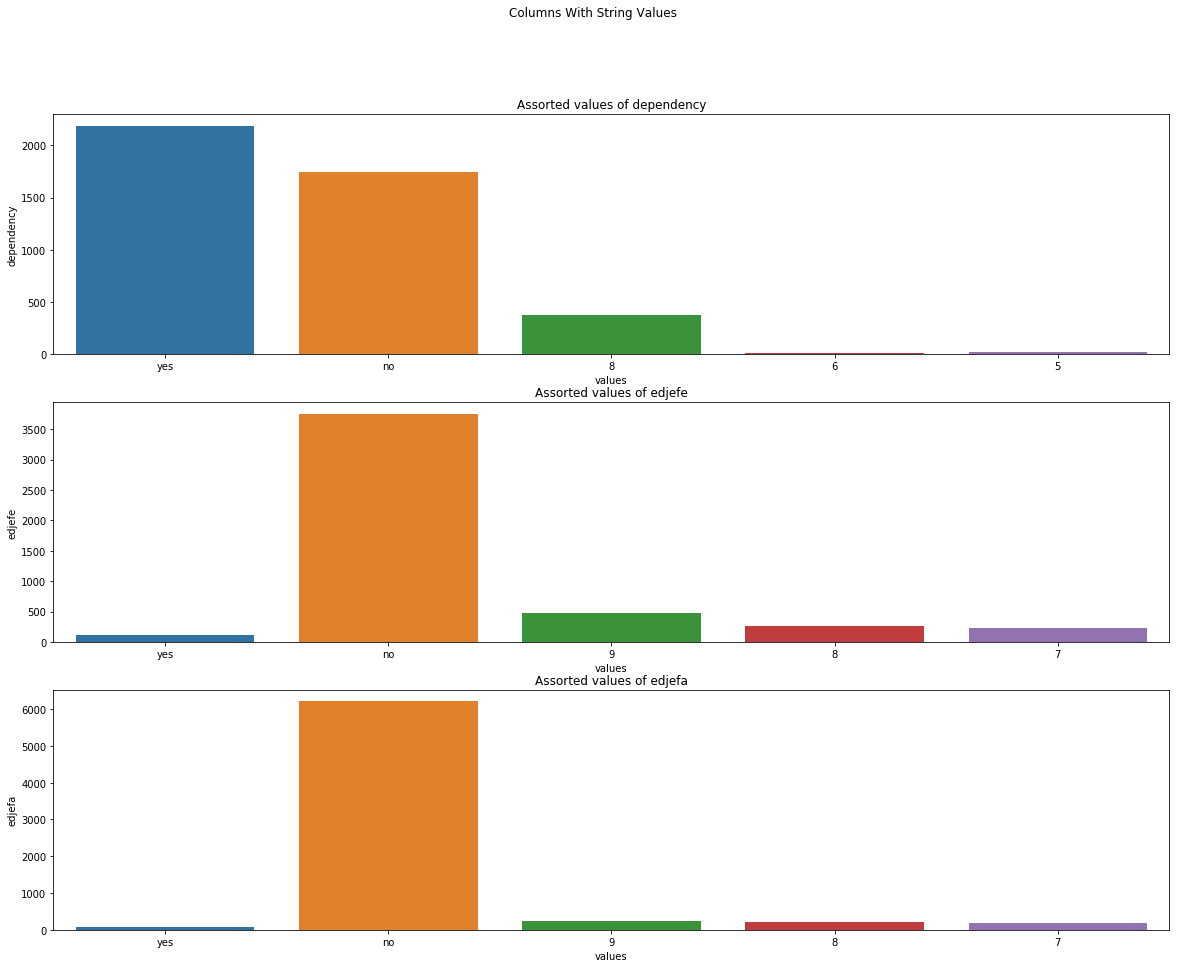

In [217]:
f, axes = plt.subplots(nrows=3, figsize=(20,15))
f.suptitle('Columns With String Values')
count = 0
for col in ['dependency', 'edjefe', 'edjefa']:
    pltDF = trainDF[col].value_counts().reset_index().sort_values(by='index', ascending=False).head(5)
    pltDF.columns = ['values', col]
    sns.barplot(x='values', y=col, data=pltDF, ax=axes[count])
    axes[count].set_title('Assorted values of {}'.format(col))
    count += 1

The sorting shows that 'yes' and 'no' are the only string columns in these variables, so they should be numeric. The documentation has values for 'yes' and 'no' for edjefe and edjefa. For dependency, it doesn't say. Let's take a closer look at the different values that dependency takes.

In [218]:
pd.DataFrame(trainDF.dependency.value_counts().sort_index())

,dependency
.16666667,7
.2,90
.22222222,11
.25,260
.2857143,9
.33333334,595
.40000001,84
.5,1495
.60000002,8
.66666669,487


Conspicuously, there are no values for 0 and 1 in this dataframe. This means that 'yes' and 'no' likely have the same interpretation as the other object variables. Let's set all no's to 0 and all yes's to 1.

In [219]:
for col in ['dependency', 'edjefe', 'edjefa']:
    for values in [('no',0),('yes',1)]:
        trainDF[col].replace(values[0], values[1], inplace=True)

## Missing Values

Now let's turn our attention to missing values in the dataset.

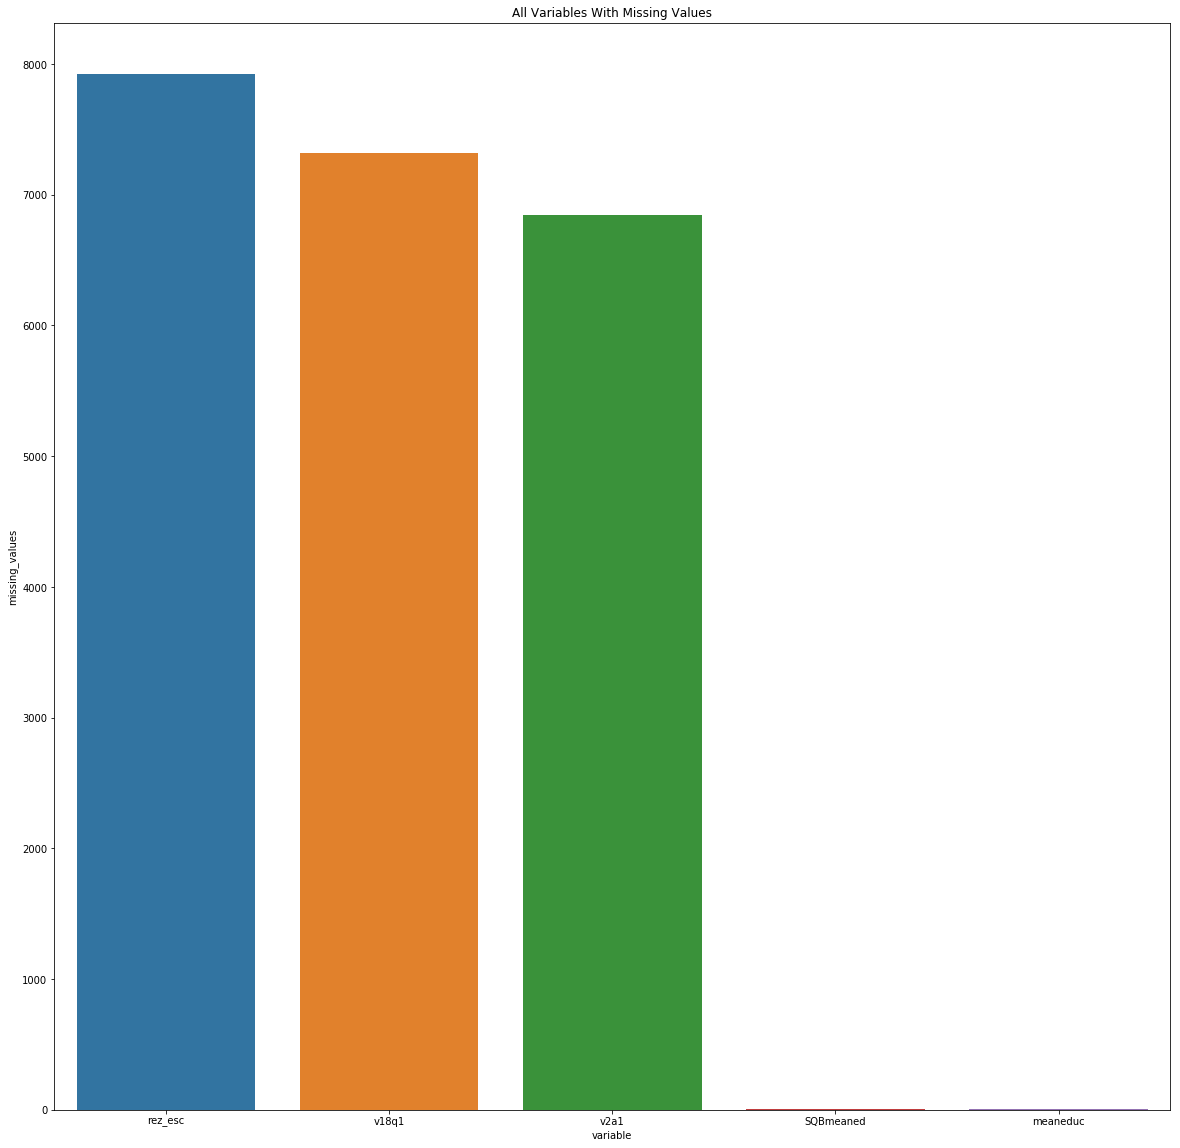

In [220]:
def missing_values(df):
    #Print out missing values sorted from high to low.
    missingDict = {}
    for var in df.columns:
        missingDict[var] = df[df[var].isnull()].shape[0]

    return pd.Series(missingDict).sort_values(ascending=False)


missingDF = pd.DataFrame(missing_values(trainDF)).reset_index()
missingDF.columns = ['variable', 'missing_values']
plt.figure(figsize=(20,20))
plt.title('All Variables With Missing Values')
sns.barplot(x='variable', y='missing_values', data=missingDF[missingDF.missing_values > 0])

Luckily, there are only 5 variables with missing values. Here are the descriptions of those variables:

rez_esc, Years behind in school

v18q1, number of tablets household owns

v2a1, Monthly rent payment

SQBmeaned, square of the mean years of education of adults (>=18) in the household

meaneduc,average years of education for adults (18+)

For the top 3 variables of this bar plot, the large number of missing variables likely means that the missing values stand for some number, likely zero. Let's take a look to confirm whether or not this is true.

First off, for years behind in school (rez_esc), it would make sense that you would have to be in school to be behind in school. Therefore, we should see young children and people over 18 have missing values for rez_esc.

Text(0,0.5,'Observations')

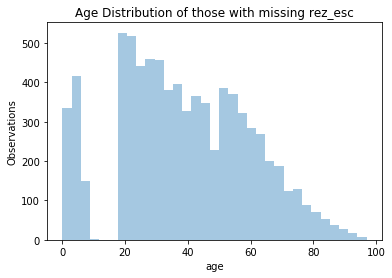

In [221]:
sns.distplot(trainDF[trainDF.rez_esc.isnull()].age, kde=False)
plt.title('Age Distribution of those with missing rez_esc')
plt.ylabel('Observations')

This confirms our suspicions since there's a big gap when people start school. Decision tree models will deal with this, but I will transform this for models that do not know how to handle missing values. I'll set the value to zero but include a flag for whether the value was missing or not.

In [222]:
trainDF['rez_esc_missing'] = trainDF.rez_esc.isnull()
trainDF.rez_esc.fillna(value=0, inplace=True)

Now time for v18q1, or the number of tablets that a house owns. It's likely that this just means the household owns zero tablets, so let's check for that.

In [223]:
print('Number of zero values for tablets:', trainDF[trainDF.v18q1 == 0].shape[0])

Number of zero values for tablets: 0


Unless Costa Ricans really like tablets, it's safe to assume that we can also fill these values with zero.

In [224]:
trainDF.v18q1.fillna(value=0, inplace=True)

Next, monthly rent payment (v2a1). These people likely own their home and don't have to pay rent. Let's check for zeros again.

In [225]:
print('Number of zero values for rent:', trainDF[trainDF.v2a1 == 0].shape[0])

Number of zero values for rent: 29


It's not completely missing, so let's check the distribution.

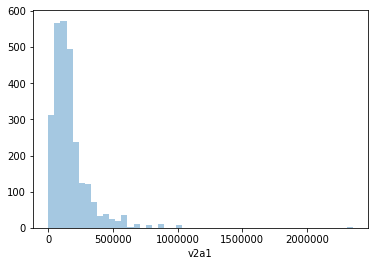

In [226]:
sns.distplot(trainDF.v2a1[~trainDF.v2a1.isnull()], kde=False)

It's still my guess that it should be zero. However, let's look at the variables tipovivi, which indicate the ownership status of the house.

tipovivi1, =1 own and fully paid house

tipovivi2, "=1 own, paying in installments"

tipovivi3, =1 rented

tipovivi4, =1 precarious

tipovivi5, "=1 other(assigned, borrowed)"

Text(0.5,1,'Missing Rent Ownership Status')

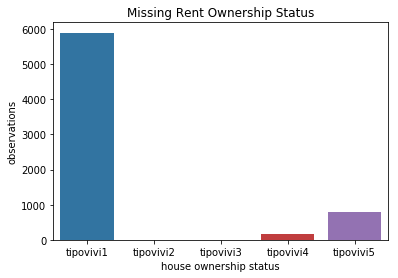

In [227]:
sns.barplot(x='index', y=0, data=trainDF[trainDF.v2a1.isnull()][['tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5']].sum().reset_index())
plt.xlabel('house ownership status')
plt.ylabel('observations')
plt.title('Missing Rent Ownership Status')

This indicates that the missing values either own the house; are in a precarious situation where they aren't paying rent for some reason; or were likely assigned the house without rent. This gives me confidence to set the missing values to zero.

In [228]:
trainDF.v2a1.fillna(value=0, inplace=True)

Now time for the last two variables that have few missing observations.

meaneduc,average years of education for adults (18+)

SQBmeaned, square of the mean years of education of adults (>=18) in the household

These variables will be missing for the same reasons since if meaneduc is missing, its square must be missing as well.

In [232]:
trainDF[trainDF.meaneduc.isnull()]

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target,rez_esc_missing


If you look at the ages, they are 18 and 19 year-olds, so it's likely that there was some error with people whose age was on the boundary of reporting mean education. I compute this myself by taking the mean of the years of education of everyone in the household (escolari).

In [230]:
for houseID in ['1b31fd159', 'a874b7ce7', 'faaebf71a']:
    trainDF.loc[trainDF['idhogar'] == houseID, 'meaneduc'] = trainDF.loc[trainDF['idhogar'] == houseID, 'escolari'].mean()
    trainDF.loc[trainDF['idhogar'] == houseID, 'SQBmeaned'] = np.square(trainDF.loc[trainDF['idhogar'] == houseID, 'meaneduc'])

In [234]:
trainDF[trainDF.meaneduc.isnull()].shape[0]

0

This fixes all missing values in our data. Next, let's check for categorical variables.

## Categorical Variables

Let's look at integer columns that have more than 2 values. The categorical variables should be there, but they will be hidden among some other variables.

In [238]:
print('Potential Categorical Variables:\n')
for var in trainDF.columns:
    if trainDF[var].dtype == 'int64' and trainDF[var].nunique() > 2:
        print(var)

Potential Categorical Variables:

rooms
r4h1
r4h2
r4h3
r4m1
r4m2
r4m3
r4t1
r4t2
r4t3
tamhog
tamviv
escolari
hhsize
hogar_nin
hogar_adul
hogar_mayor
hogar_total
bedrooms
qmobilephone
age
SQBescolari
SQBage
SQBhogar_total
SQBedjefe
SQBhogar_nin
agesq
Target


None of these should be dummy variables since they are quantities of something. It looks like all of the dummies have already been created.

## Outliers

Time to look for some outliers in our data.

## Data Aggregation

One strange aspect of this problem is that we need to predict the poverty level for the head of household and not for each individual of the household. I need to then aggregate many of the individual variables at the head of household level.

# Data Visualization and Analysis

Let's take a closer look at the relationships in the data. First let's look at correlations. Since there are so many variables, let's first examine the variables most correlated with Target.

In [248]:
print('Most positively and negatively correlated variables with Target\n')
print(trainDF.corr().Target.sort_values(ascending=False).head(10), '\n')
print(trainDF.corr().Target.sort_values(ascending=True).head(10))

Most positively and negatively correlated variables with Target

Target         1.000000
meaneduc       0.337813
cielorazo      0.308913
escolari       0.308293
SQBescolari    0.300823
eviv3          0.296171
epared3        0.292884
pisomoscer     0.283598
SQBmeaned      0.278823
paredblolad    0.263162
Name: Target, dtype: float64 

hogar_nin         -0.328094
r4t1              -0.321261
SQBhogar_nin      -0.310591
overcrowding      -0.290863
SQBovercrowding   -0.261642
r4m1              -0.258564
r4h1              -0.231167
eviv1             -0.211841
pisocemento       -0.207680
epared1           -0.204044
Name: Target, dtype: float64


A quick reminder that the most destitute people have a target of 1. Therefore, the positively correlated values indicate the individual is not poor. Education is extremely important, along with having good walls, ceilings, and floors. The variables most correlated with poverty are the number of people in the household and poor quality floors and walls. Cement floors especially are important in developing countries because it improves living standards tremendously. None of these variables stand out as truly surprising.

With these most correlated variables, let's look at their correlation to each other.

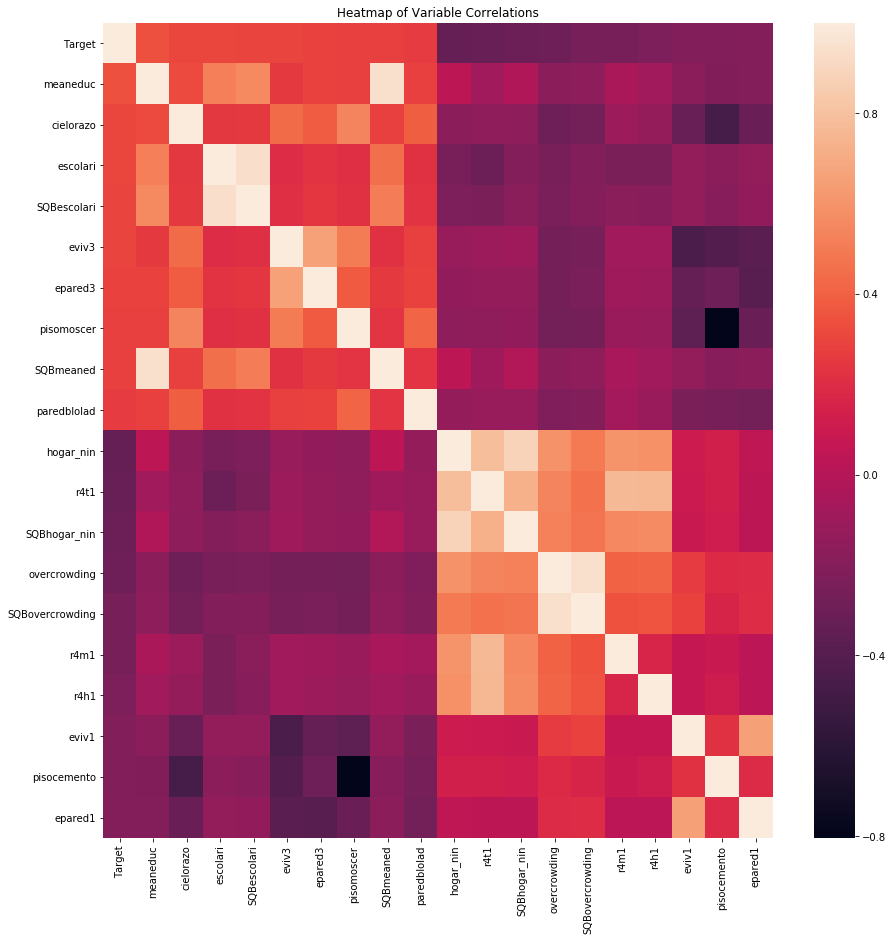

In [258]:
corr_list = []
corr_list.extend(trainDF.corr().Target.sort_values(ascending=False).head(10).index)
corr_list.extend(trainDF.corr().Target.sort_values(ascending=True).head(10).index)
plt.figure(figsize=(15,15))
plt.title('Heatmap of Variable Correlations')
sns.heatmap(trainDF[corr_list].corr())

The variables that are correlated with poverty are also correlated with each other, as well as those that are negatively correlated with poverty.

Let's look at the distribution of some of these relevant variables.

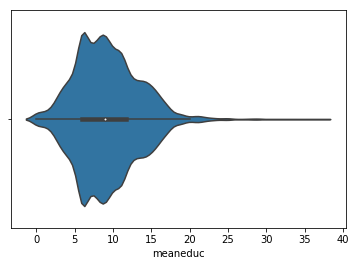

In [262]:
sns.violinplot(x='meaneduc', data=trainDF)

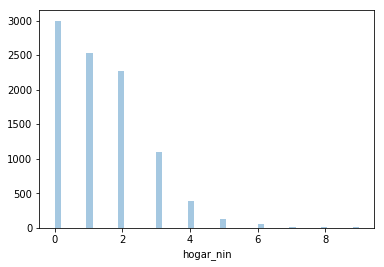

In [267]:
sns.distplot(trainDF['hogar_nin'], kde=False)

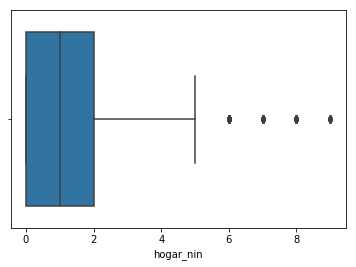

In [268]:
sns.boxplot(x='hogar_nin', data=trainDF)

While above 5 children are outliers, we have no reason to believe that these entries are wrong. These families can be especially susceptible to poverty, so I will leave them in the data.

# Models

This is a classification problem, so I'll be using models suited for that task, such as SVM, random forest, and XGBoost. It's important to understand the nature of this classification problem. There are four different classes for the target, and the frequency of each may be unbalanced. This changes how we treat the weights of each class. Let's look at the balance of the classes first.

Text(0,0.5,'Observations')

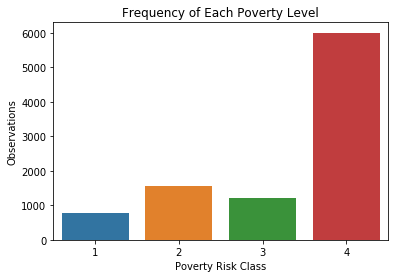

In [277]:
sns.barplot(x='index', y='Target', data=trainDF.Target.value_counts().reset_index())
plt.title('Frequency of Each Poverty Level')
plt.xlabel('Poverty Risk Class')
plt.ylabel('Observations')

There are many more people that are not in poverty than are in poverty. This leads to some interesting questions about how the owners of this dataset want to balance precision and recall for each class. If funds are low, there is incentive to never have false positives for class 1 to make sure that people in need are truly receiving aid. If funds are high, they may want to have low false negatives for class 1 to ensure everyone that needs help gets it. However, they want the highest macro F1 score, which is the average of the F1 score for each class. I don't believe this is the best metric for these models, but we will use it and try to get our models to weight each class the same. 

In [281]:
from sklearn.model_selection import train_test_split
targetDF = trainDF.loc[:,'Target']
trainDF.drop(['Target'], axis=1, inplace=True)
XTrain, XTest, YTrain, YTest = train_test_split(trainDF, targetDF, random_state=12)

First, we are going to do a random forest as the baseline. This model is fairly generic and can handle any errors that might be in the data.

In [279]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, classification_report

n_ests = [100,2500,5000]
max_depths = [1,3,5,10]
class_weights = ['balanced', None]

randForest = RandomForestClassifier()
gridsearch = GridSearchCV(randForest, {'n_estimators': n_ests, 'max_depth': max_depths, 'class_weight': class_weights})
gridsearch.fit(XTrain, YTrain)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 2500, 5000], 'max_depth': [1, 3, 5, 10], 'class_weight': ['balanced', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)